In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [2]:
df = pd.read_csv('1.csv')

In [3]:
df

,Id,Start time,Completion time,Email,Name,What is your gender?,In which year you were born: ________ (e.g.1998),What is your current employment status?,How frequently do you buy clothes before COVID-19 pandemic?,How frequently do you buy clothes after the COVID-19 pandemic?,...,Please specify the measurement,How do you deal with the old clothes or the clothes you don’t like after the COVID-19 pandemic\n \n,Please specify the measurement1,"After the COVID-19 pandemic, I have become more aware of the negative environmental impact of the textile and fast fashion industry..","My attitude towards sustainability has increasingly influenced my purchase decisions in fast fashion since the COVID-19 pandemic. For instance, I will sometimes give up on fast fashion items purchases",How important is it for you that fast fashion products use eco-friendly materials or taking a sustainable approach after the COVID-19 pandemic?.,I have started to prefer brands that are more engaged in promoting sustainability practices since the COVID-19 pandemic..,Have you observed an increase in marketing related to sustainability from fast fashion brands since the COVID-19 pandemic? How does this influence your purchasing decisions?,How has your perception of sustainable fashion changed since the COVID-19 pandemic? What could be your motivation for a sustainable fashion purchase? Please describe in detail.,"Describe any significant changes you've noticed in the quality, sustainability, or marketing of fast fashion products since the COVID-19 pandemic began."
0,1,7/29/2024 14:33,7/29/2024 14:47,anonymous,NaN,Woman,2002,Students,Every two month,NaN,...,NaN,I have them in my closet but never use them.,NaN,Neither agree nor disagree,Agree,Neutral,Neither agree nor disagree,Somewhat increased and somewhat influenced my ...,Purchasing sustainable fashion can better cope...,The quality of fast fashion products at the sa...
1,2,08/01/2024 12:40,08/01/2024 12:47,anonymous,NaN,Man,2001,Students,Monthly,Weekly,...,NaN,I donate them.,NaN,NaN,Strongly disagree,Somewhat important,Agree,Somewhat increased and somewhat influenced my ...,I tried to be more environment-friendly.,NaN
2,3,08/01/2024 12:56,08/01/2024 13:04,anonymous,NaN,Woman,1974,Retired,Quarterly,Annually,...,NaN,I donate them.,NaN,NaN,Neither agree nor disagree,Somewhat important,Agree,I have not noticed any changes,NaN,NaN
3,4,08/01/2024 13:04,08/01/2024 13:09,anonymous,NaN,Woman,1971,Full-time employed,Quarterly,Quarterly,...,NaN,I donate them.,NaN,NaN,Agree,Somewhat important,Agree,Somewhat increased and somewhat influenced my ...,NaN,NaN
4,5,08/01/2024 13:17,08/01/2024 13:35,anonymous,NaN,Woman,1975,Self-employed,Quarterly,Annually,...,NaN,I reuse them after renovation.,NaN,NaN,Agree,Neutral,Disagree,No change in marketing and no influence on my ...,I didn’t take sustainability to my consideration,"No, I didn’t notice any change"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,149,8/21/2024 9:45,8/21/2024 9:52,anonymous,NaN,Man,1985,Part-time employed,Monthly,Every two month,...,NaN,I have them in my closet but never use them.,NaN,NaN,Agree,Extremely important,Agree,No change in marketing and no influence on my ...,Staying home more made me appreciate the comfo...,Fast fashion brands are now promoting their pr...
147,150,8/21/2024 9:45,8/21/2024 9:52,anonymous,NaN,Woman,1986,Full-time employed,Every two month,Every two month,...,NaN,I reuse them after renovation.,NaN,NaN,Strongly agree,Somewhat important,Strongly agree,Somewhat increased and somewhat influenced my ...,pandemic highlighted the fragility of global s...,Fast fashion retailers have been quicker to ad...
148,151,8/21/2024 9:40,8/21/2024 9:57,anonymous,NaN,Man,1987,Full-time employed,Annually,Annually,...,NaN,I donate them.,NaN,NaN,Neither agree nor disagree,Somewhat not important,Disagree,No change in marketing and no influence on my ...,it has remained the same,it has remained the same
149,152,8/21

In [4]:
new_column_names = {old_name: str(i + 1) for i, old_name in enumerate(df.columns)}

# Apply the new column names to the DataFrame
df_renamed = df.rename(columns=new_column_names)

In [5]:
columns_to_keep_1 = [
    "38"
]
columns_to_keep_2 = [
    "48"
]
columns_to_keep_3 = [
    "49"
]
df1 = df_renamed[columns_to_keep_1]
df2 = df_renamed[columns_to_keep_2]
df3 = df_renamed[columns_to_keep_3]

In [6]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()

In [7]:
def remove_numerical(text):
    return re.sub(r'\b\d+\b', '', text)
    
def to_lower(text):
    return text.lower()

def remove_url(text):
    return re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\'(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

def remove_email(text):
    return re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

In [35]:
# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def bag_of_words_analysis(texts):
    # Standard English stop words
    stop_words = set(stopwords.words('english'))
    
    # Add custom stop words
    custom_stop_words = ['due','purchase','pandemic','much','really','sustainability','sustainable','ive','since','dont','would','im','havent','changes','fast','fashion','clothes','clothing','change','buy','think','made','like','changed']  # Add more as needed
    stop_words.update(custom_stop_words)
    
    word_counts = Counter()
    
    for text in texts:
        # Tokenize and convert to lower case
        tokens = word_tokenize(text.lower())
        # Remove stopwords and non-alphabetical tokens
        filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        # Update word count
        word_counts.update(filtered_tokens)
    
    most_common = word_counts.most_common(20)
    words, counts = zip(*most_common) if most_common else ([], [])
    
    # Plotting
    plt.figure(figsize=(10, 8))
    plt.bar(words, counts)
    plt.title("Top 20 Most Frequent Words")
    plt.xticks(rotation=45)
    plt.show()
    
    return most_common


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nevea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nevea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


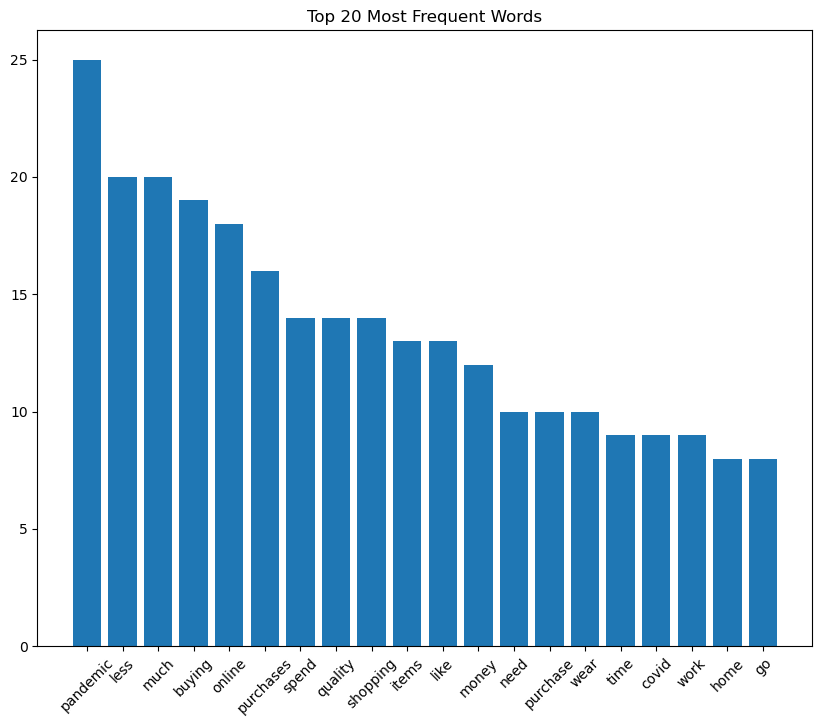

In [9]:
df1['38'] = df1['38'].apply(lambda x: to_lower(x))
df1['38'] = df1['38'].apply(lambda x: remove_url(x))
df1['38'] = df1['38'].apply(lambda x: remove_email(x))
df1['38'] = df1['38'].apply(lambda x: remove_punctuation(x))
df1['38'] = df1['38'].apply(lambda x: remove_numerical(x))
#apply bag of words on reviews_1
most_common_words = bag_of_words_analysis(df1['38'])

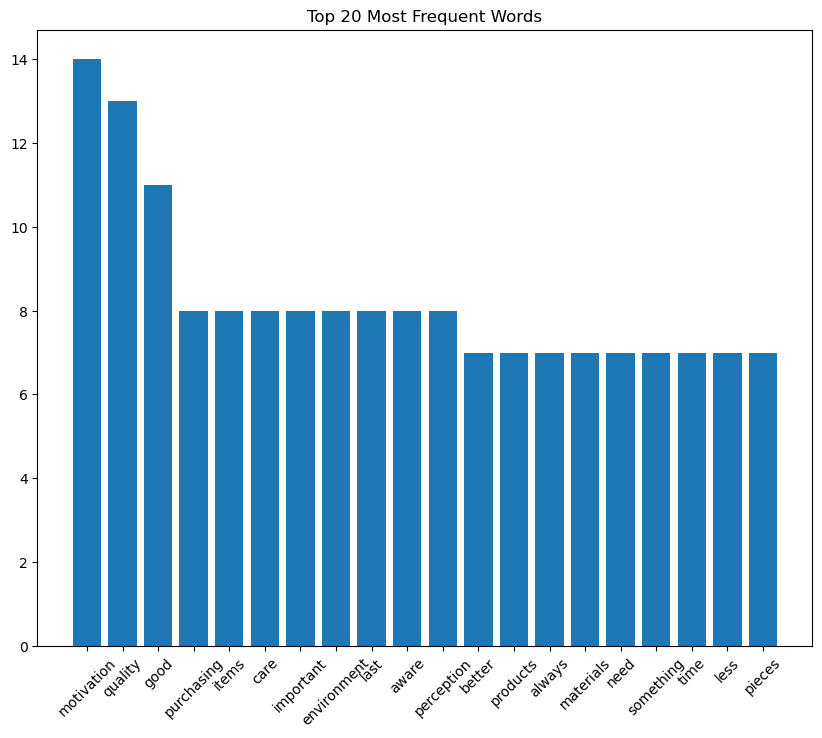

In [36]:
df2['48'] = df2['48'].apply(lambda x: to_lower(x))
df2['48'] = df2['48'].apply(lambda x: remove_url(x))
df2['48'] = df2['48'].apply(lambda x: remove_email(x))
df2['48'] = df2['48'].apply(lambda x: remove_punctuation(x))
df2['48'] = df2['48'].apply(lambda x: remove_numerical(x))
#apply bag of words on reviews_1
most_common_words = bag_of_words_analysis(df2['48'])

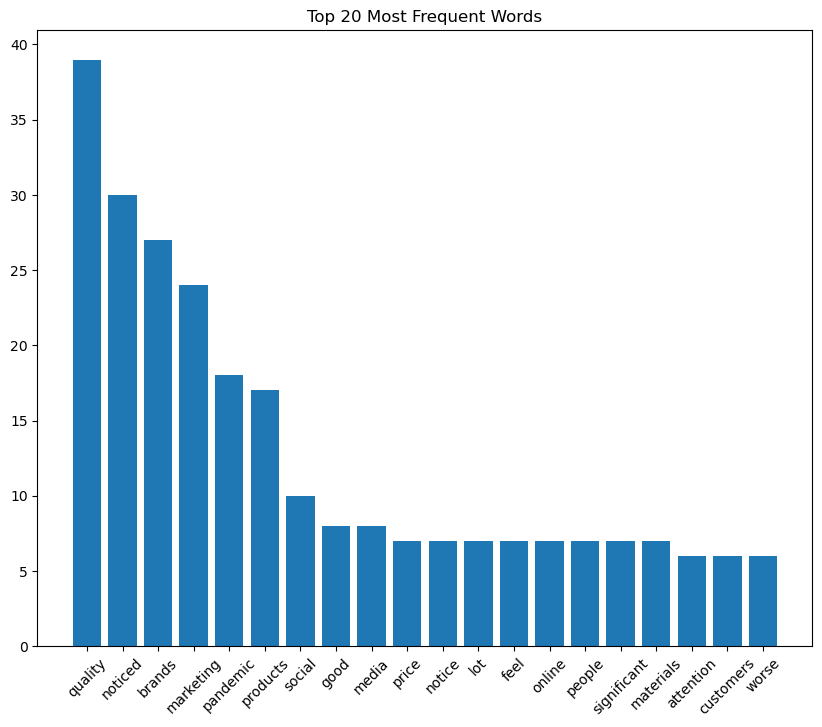

In [27]:
df3['49'] = df3['49'].apply(lambda x: to_lower(x))
df3['49'] = df3['49'].apply(lambda x: remove_url(x))
df3['49'] = df3['49'].apply(lambda x: remove_email(x))
df3['49'] = df3['49'].apply(lambda x: remove_punctuation(x))
df3['49'] = df3['49'].apply(lambda x: remove_numerical(x))
#apply bag of words on reviews_1
most_common_words = bag_of_words_analysis(df3['49'])

In [29]:
# Define custom stop words
custom_stop_words = ['havent','feel','notice','idk','dont','does','change','changed','did','didnt','changes','maybe','honestly','love','really','think']

# Combine with default English stop words 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
all_stop_words = list(ENGLISH_STOP_WORDS.union(set(custom_stop_words)))

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

def tf_idf_analysis(texts, top_n=20):
    # Initialize TfidfVectorizer with the combined list of stop words
    vectorizer = TfidfVectorizer(stop_words=all_stop_words)
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_array = np.array(vectorizer.get_feature_names_out())

    # Dictionary to keep track of words and their corresponding scores
    max_tfidf_dict = {}
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix.getrow(i)
        for word, score in zip(row.indices, row.data):
            feature_word = feature_array[word]
            max_tfidf_dict[feature_word] = max(max_tfidf_dict.get(feature_word, 0), score)

    # Sort words by their score and get top n
    sorted_words = sorted(max_tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:top_n]
    words, scores = zip(*sorted_words)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.bar(words, scores)
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.title(f'Top {top_n} Words with Highest TF-IDF Scores')
    plt.xticks(rotation=45)
    plt.show()

    return sorted_words


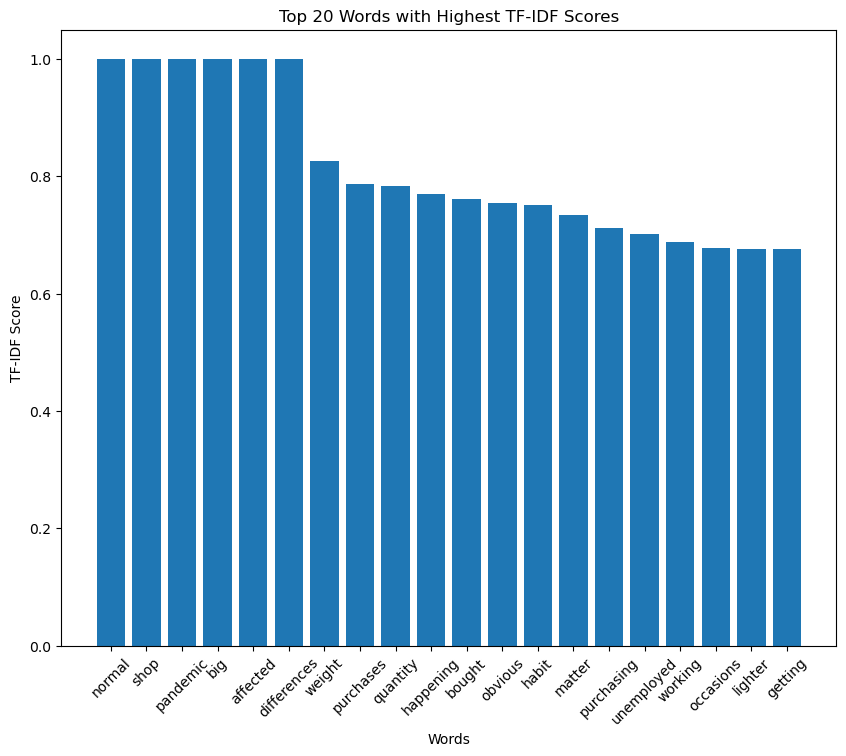

[('normal', 1.0),
 ('shop', 1.0),
 ('pandemic', 1.0),
 ('big', 1.0),
 ('affected', 1.0),
 ('differences', 1.0),
 ('weight', 0.8266642713844391),
 ('purchases', 0.7869707618118454),
 ('quantity', 0.7830024957240477),
 ('happening', 0.7703574909293678),
 ('bought', 0.7618983427955986),
 ('obvious', 0.7545747294995132),
 ('habit', 0.7510444326771438),
 ('matter', 0.7345574364059918),
 ('purchasing', 0.7116840953798435),
 ('unemployed', 0.701465952972253),
 ('working', 0.6883884695455756),
 ('occasions', 0.678546514706735),
 ('lighter', 0.6756382554288821),
 ('getting', 0.6756382554288821)]

In [13]:
tf_idf_analysis(df1['38'])

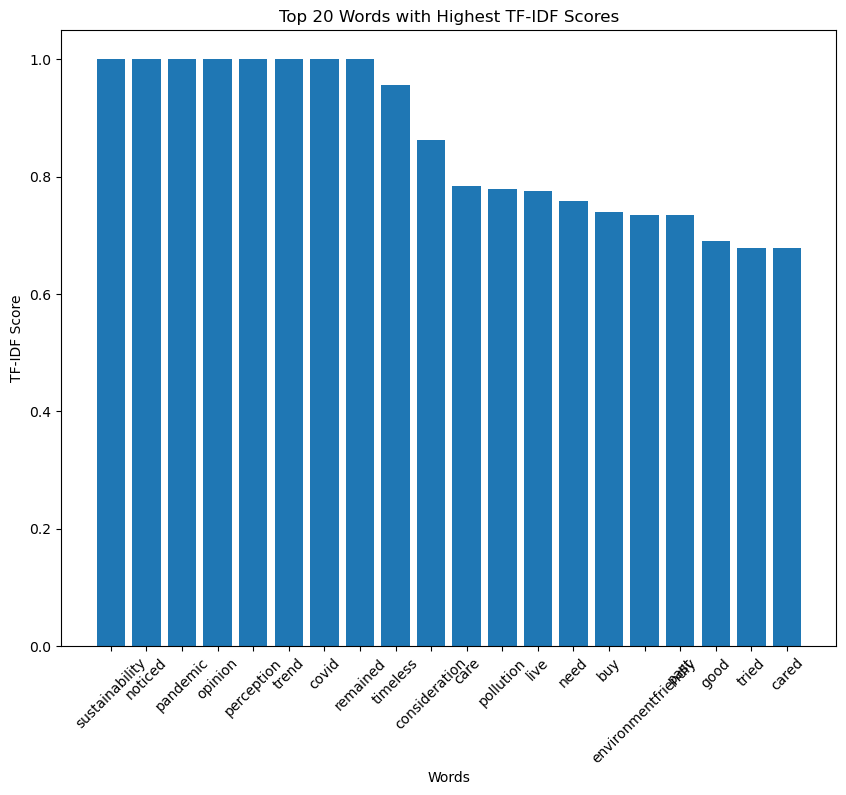

[('sustainability', 1.0),
 ('noticed', 1.0),
 ('pandemic', 1.0),
 ('opinion', 1.0),
 ('perception', 1.0),
 ('trend', 1.0),
 ('covid', 1.0),
 ('remained', 1.0),
 ('timeless', 0.9559942995018252),
 ('consideration', 0.8624774361599274),
 ('care', 0.7832628533040045),
 ('pollution', 0.7791798749061655),
 ('live', 0.7758877314039381),
 ('need', 0.7590673450946832),
 ('buy', 0.7398171436836326),
 ('environmentfriendly', 0.7345574364059918),
 ('past', 0.7345574364059918),
 ('good', 0.6902011357556839),
 ('tried', 0.678546514706735),
 ('cared', 0.678546514706735)]

In [14]:
tf_idf_analysis(df2['48'])

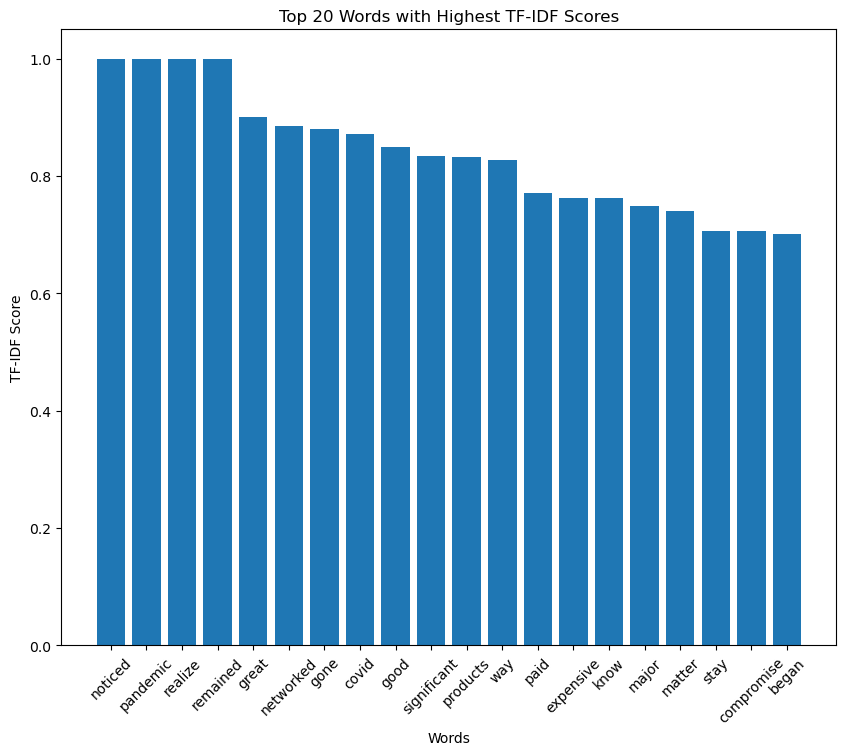

[('noticed', 1.0),
 ('pandemic', 1.0),
 ('realize', 1.0),
 ('remained', 1.0),
 ('great', 0.9006761167647037),
 ('networked', 0.8856105011526971),
 ('gone', 0.8804638741335316),
 ('covid', 0.8711463688175998),
 ('good', 0.8492833634523007),
 ('significant', 0.8333796019733843),
 ('products', 0.832255694924646),
 ('way', 0.827309665073048),
 ('paid', 0.7705139418241025),
 ('expensive', 0.7619799812682588),
 ('know', 0.7619799812682588),
 ('major', 0.7482178954443164),
 ('matter', 0.7410285265015436),
 ('stay', 0.7071067811865476),
 ('compromise', 0.7071067811865476),
 ('began', 0.7010052556150936)]

In [30]:
tf_idf_analysis(df3['49'])